This is the coding section for INF1340 final project.

# Preparation

In [2]:
import pandas as pd
import numpy as np
from datascience import *
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
#importing all the necessary packages for the final project

In [3]:
!pip install openpyxl
#installing openpyxl for Jupyter to be able to read xlsx files directly

In [4]:
pd.set_option('display.max_columns', None)
#easier to read all the columns within Jupyter

At the end of my mid-term project, I have merged all the data into two dataframes. Therefore, we will analysize them one by one in the following section.

In [5]:
Dataset1 = pd.ExcelFile('TidyData1.xlsx')
Dataset2 = pd.ExcelFile('TidyData2.xlsx')
#importing both of the cleaned dataframes into Python

# Research Question of this Exploratory Study

We would like to see how the international immigration stock of Canada, the United States of America, and North America (Bermuda, Canada, Greenland, Saint Pierre and Miquelon, and United States of America) are changing relative to the world's immigrant stock from 1990 to 2015.

# Research Data

We will have a look at our dataset first to check all the variables and observations we have at hand.

In [6]:
df1 = pd.read_excel(Dataset1, 'Sheet1')
df1.head(20)
#Let's have a look of the first dataset

,Unnamed: 0,Sort_order,major_area,region,country,Notes,Country_code,Type_of_data(a),year,gender_break_down,International_migrant_stock_at_mid-year,Total_population_at_mid-year,International_migrant_stock_as_percentage_of_total_population,migrants_as_percentage_of_international_migrant_stock,Estimated_refugee_stock_at_mid-year,Refugees_as_percentage_of_international_migrant_stock
0,0,1,WORLD,WORLD,WORLD,NaN,900,NaN,1990,both,152563212,5309667.699,2.87331,NaN,18836571,12.346732
1,1,2,WORLD,Developed regions,Developed regions,(b),901,NaN,1990,both,82378628,1144463.062,7.198015,NaN,2014564,2.445494
2,2,3,WORLD,Developing regions,Developing regions,(c),902,NaN,1990,both,70184584,4165204.637,1.685021,NaN,16822007,23.968236
3,3,4,WORLD,Developing region,Least developed countries,(d),941,NaN,1990,both,11075966,510057.629,2.171513,NaN,5048391,45.56588
4,4,5,WORLD,Developing region,Less developed regions excluding least develop...,NaN,934,NaN,1990,both,59105261,3655147.008,1.617042,NaN,11773616,19.919743
5,5,6,WORLD,Sub-Saharan Africa,Sub-Saharan Africa,(e),947,NaN,1990,both,14690319,491497.691,2.988889,NaN,5516042,37.548824
6,6,7,Africa,Africa,Africa,NaN,903,NaN,1990,both,15690623,631614.304,2.48421,NaN,5687352,36.246821
7,7,8,Africa,Eastern Africa,Eastern Africa,NaN,910,NaN,1990,both,5964031,198231.687,3.008616,NaN,3168001,53.118453
8,8,9,Africa,Eastern Africa,Burundi,NaN,108,B R,1990,both,333110,5613.141,5.934467,NaN,267929,80.43259
9,9,10,Africa,Eastern Africa,Comoros,NaN,174,B,1990,both,14079,415.144,3.391353,NaN,0,0


# Data Analysis 

## The Use of Line Graph

First, we will look at the trend of the overall international immigrant stock amount wroldwide from 1990 to 2015, as well as the internaitonal immigrant stock amount for North America, Canada, and the United State respectively.

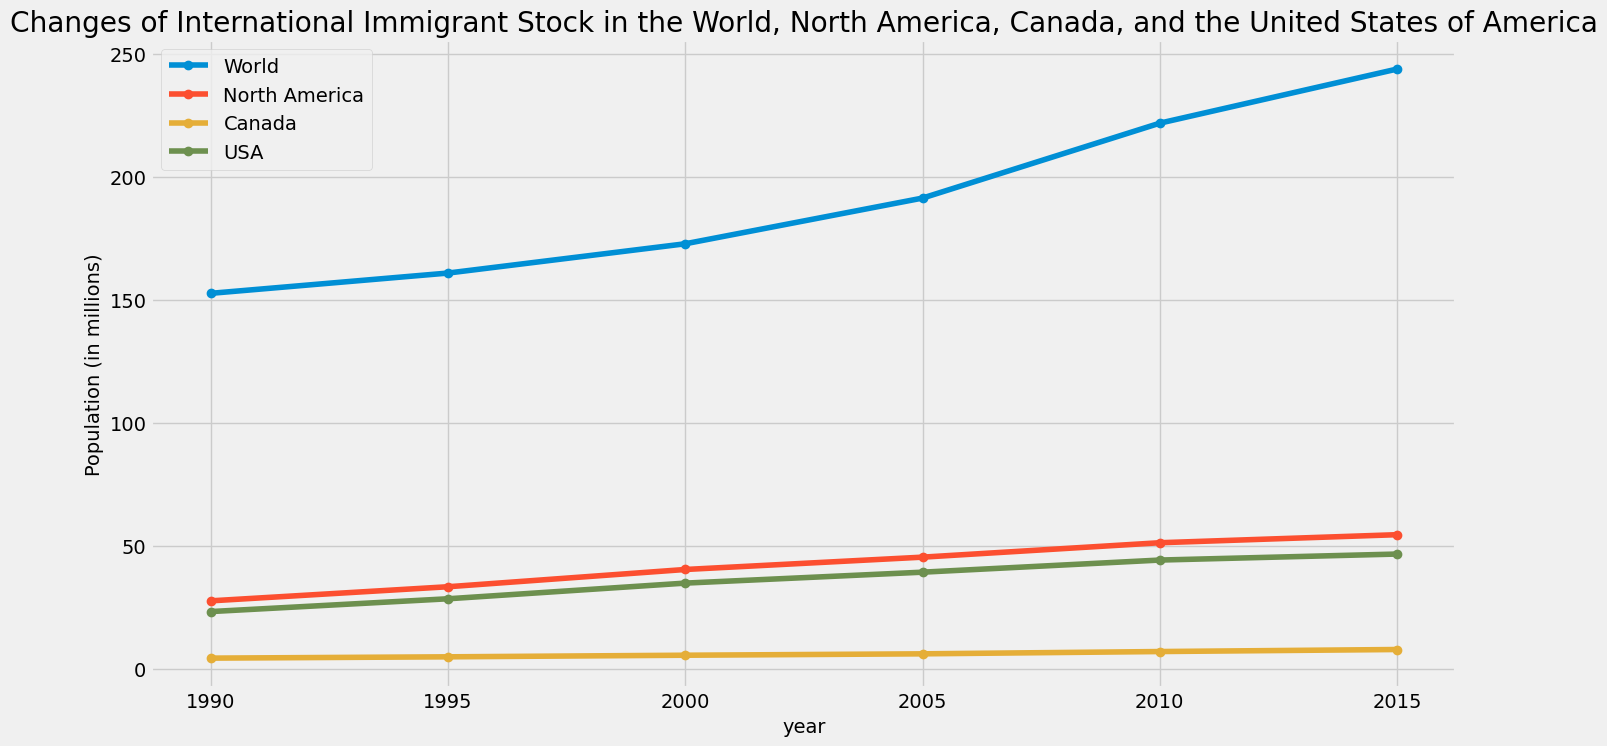

In [7]:
year = ['1990', '1995', '2000', '2005','2010','2015']
world = [152.563212, 160.801752, 172.703309, 191.269100, 221.714243, 243.700236]
North_America = [27.610542, 33.341147, 40.351848, 45.363387, 51.220996, 54.488725]
Canada = [4.333318, 4.864778, 5.511914, 6.078985, 7.011226, 7.835502]
USA = [23.251026, 28.451053, 34.814053, 39.258293, 44.183643, 46.627102]
#entering all the data from our dataset

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)
#changing the plot size to make the graph look better

plt.plot(year, world, label ='World', marker='o')
plt.plot(year, North_America, label ='North America', marker='o')
plt.plot(year, Canada, label ='Canada', marker='o')
plt.plot(year, USA, label ='USA', marker='o')
#plotting different lines

plt.title('Changes of International Immigrant Stock in the World, North America, Canada, and the United States of America')
plt.xlabel('year',fontsize=14)
plt.ylabel('Population (in millions)',fontsize=14)
plt.legend()
plt.grid(True)
plt.show()
#labelling and changing settings of the graph

It seems that overall international immigration stock is increasing from 1990 to 2015 for both the world and for North America. From the line graph, we can also see that from 2000 to 2010, there was a significant spike in world international immigration stock amount, but this phenomonon was not observed in North America, where the increase in international immigrant population was increasing at a steady pace. Therefore, we choose the year 2010 as our new research interest and do more analysis on the year 2010.

## The Use of Pie Chart

Now, we will have a look at what is the proportion of North American international immigrant stock, relative to the world's overall international immigrant stock in 2010 by drawing a pie chart.

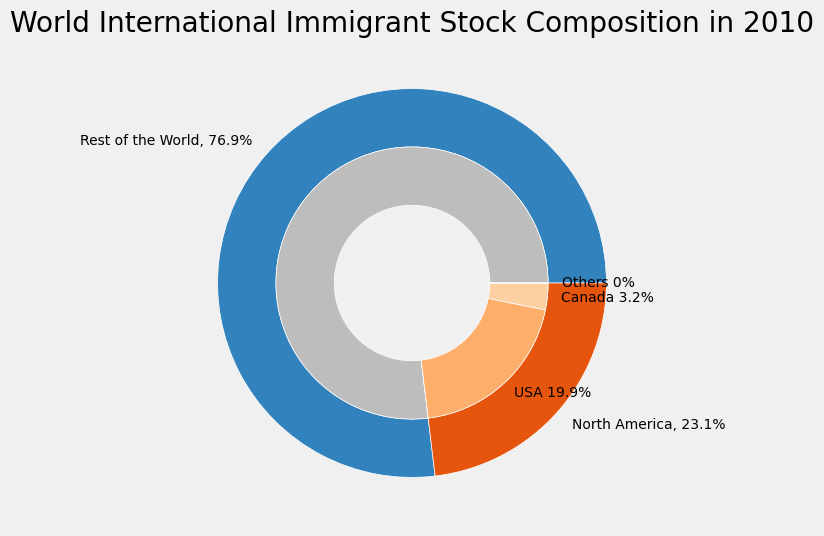

In [8]:
fig, ax = plt.subplots(figsize=(12,6))
size = 0.3
vals = np.array([[170493247,0,0], [44183643, 7011226, 26127]])
#setting the values for each pie

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([18, 2, 5, 6, 7]))
#choosing the colours for each slice

labels_inner = ["", "", "", "USA 19.9%", "Canada 3.2%", "Others 0%"]
labels_outer = ["Rest of the World, 76.9%", "North America, 23.1%"]
#labelling the legend

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'),labels=labels_outer, textprops={'fontsize': 10})
ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'),labels=labels_inner, textprops={'fontsize': 10})
#plotting the nested pie chart

ax.set(aspect="equal", title='World International Immigrant Stock Composition in 2010')
plt.show()

We will also draw the same graph for 2000, just for comparison.

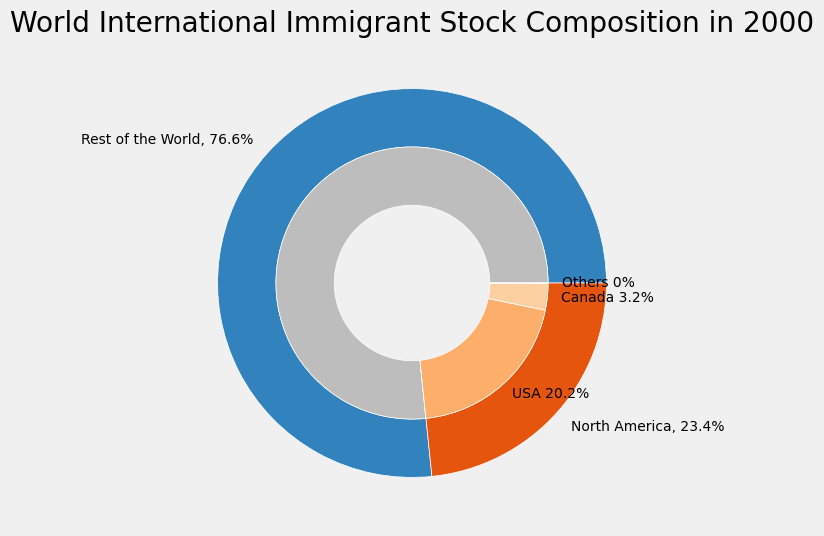

In [9]:
fig, ax = plt.subplots(figsize=(12,6))
size = 0.3
vals = np.array([[132351461,0,0], [34814053, 5511914, 25881]])
#setting the values for each pie

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([18, 2, 5, 6, 7]))
#choosing the colours for each slice

labels_inner = ["", "", "", "USA 20.2%", "Canada 3.2%", "Others 0%"]
labels_outer = ["Rest of the World, 76.6%", "North America, 23.4%"]
#labelling the legend

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'),labels=labels_outer, textprops={'fontsize': 10})
ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'),labels=labels_inner, textprops={'fontsize': 10})
#plotting the nested pie chart

ax.set(aspect="equal", title='World International Immigrant Stock Composition in 2000')
plt.show()

Comparing these two pie charts, it is clear that despite the dramatic increase in world international immigrant stock during the 2000-2010 period, North Ameracan international immigrant stock population remained at slightly over 23%.

## The Use of Bar Chart

Let us focus on North American international immigrant stock in 2010. We will have a look at the international immigrant stock population in North America, as well as the number for each country/area, individually.

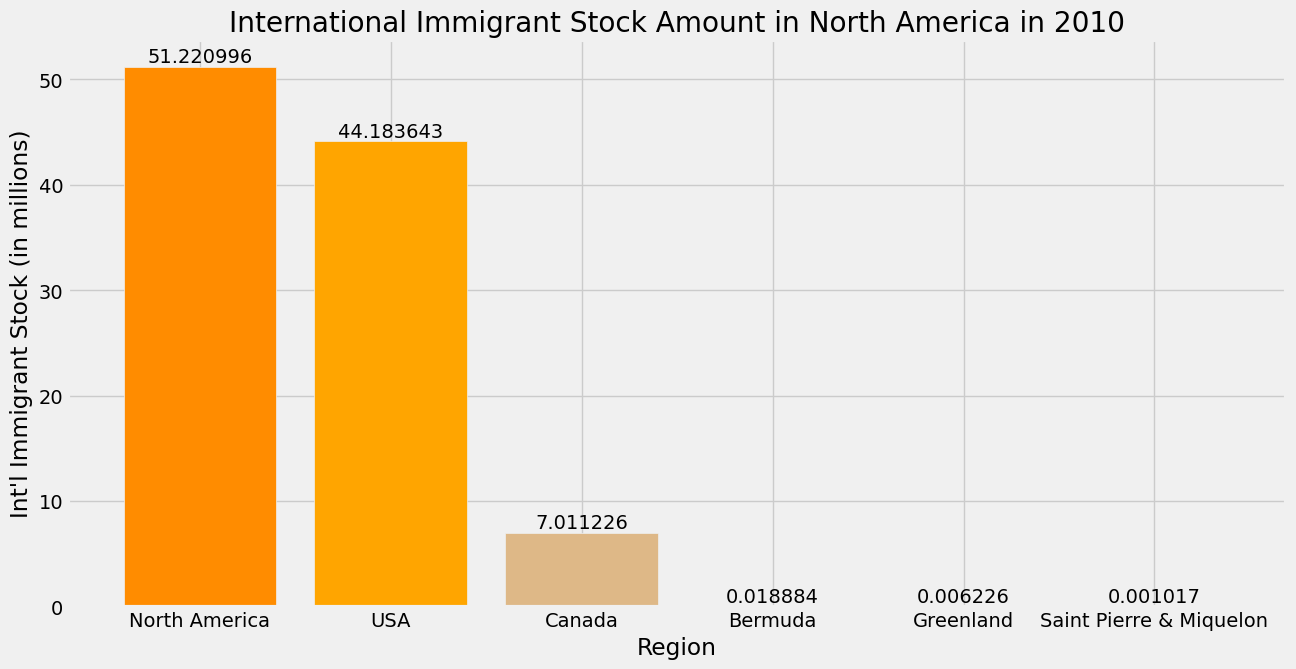

In [10]:
x = ["North America", "USA", "Canada", "Bermuda", "Greenland","Saint Pierre & Miquelon"]
y = [51.220996, 44.183643, 7.011226, 0.018884, 0.006226, 0.001017]
#Entering data

plt.figure(figsize=(14,7))

plt.xlabel('Region')
plt.ylabel("Int'l Immigrant Stock (in millions)")
plt.title('International Immigrant Stock Amount in North America in 2010')
plt.bar(x, y, color=['darkorange', 'orange', 'burlywood', 'wheat', 'blanchedalmond', 'floralwhite'])
#Naming the labels and plotting the chart

for i in range(len(x)):
    plt.text(i, y[i], y[i], ha = "center", va = "bottom")
#Adding the values on top of the bars to make the chart more informative

plt.show()

From the bar chart, it is obvious that most of the North American international immigrant stock population is consisted of USA and Canadian international immigrant stock population. However, these two countries also have a much larger population base. Therefore it might be more meanful if we compare their percentage of international immigration stock relative to their total population, respectively.

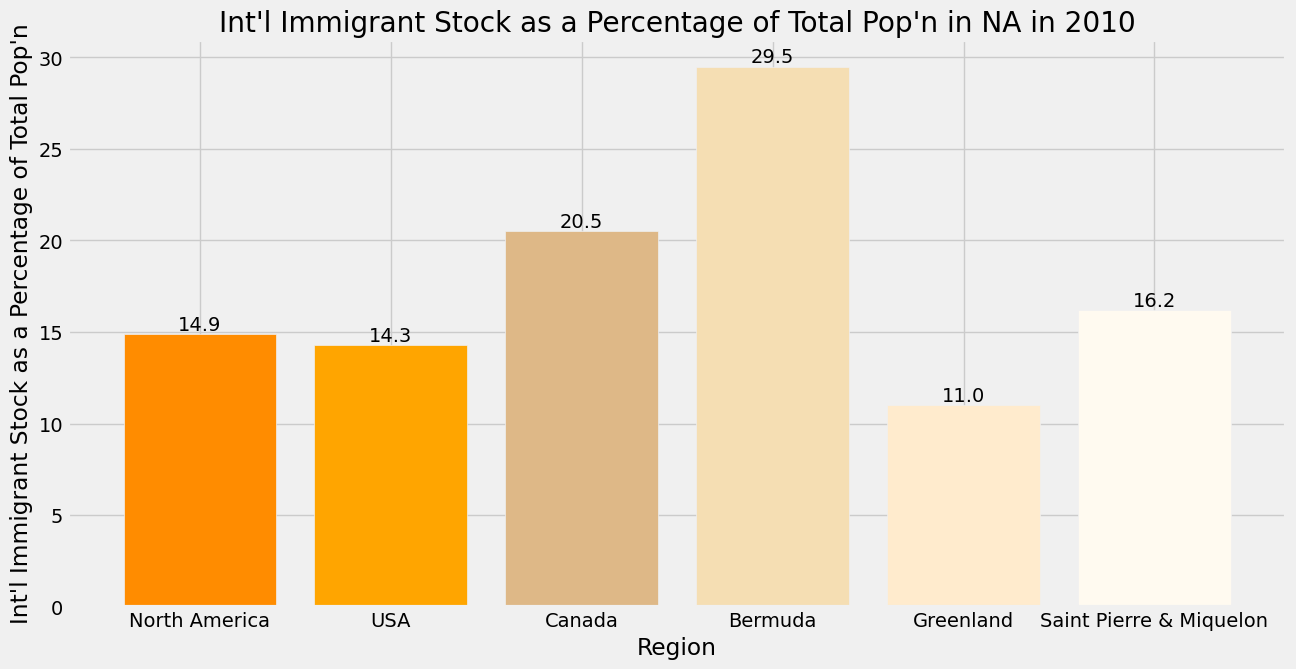

In [11]:
x = ["North America", "USA", "Canada", "Bermuda", "Greenland","Saint Pierre & Miquelon"]
y = [14.9, 14.3, 20.5, 29.5, 11.0, 16.2]
#Entering data

plt.figure(figsize=(14,7))

plt.xlabel('Region')
plt.ylabel("Int'l Immigrant Stock as a Percentage of Total Pop'n")
plt.title("Int'l Immigrant Stock as a Percentage of Total Pop'n in NA in 2010")
plt.bar(x, y, color=['darkorange', 'orange', 'burlywood', 'wheat', 'blanchedalmond', 'floralwhite'])
#Naming the labels and plotting the chart

for i in range(len(x)):
    plt.text(i, y[i], y[i], ha = "center", va = "bottom")
#Adding the values on top of the bars to make the chart more informative

plt.show()

Very different from what we have seen previously, when comparing the percentage of international immigrant stock relative to the total population, Bermuda is leading in North America. Canada is having around 20% of its total population as international immigrant stock, and 14.3% for the USA.

## The Use of Box Plot

But how do we know if 20% or 14% is high or low, compared to other countries around the world? As a result, we need to draw a box plot to have all the values of each country shown in the same graph to get a rough idea.

Let us get the data we need first from our cleaned dataframe from the mid-term project.

In [12]:
df_new = df1[['country','year','gender_break_down','International_migrant_stock_as_percentage_of_total_population']].copy()
#Selecting only the columns we need.
df_new.head(20)
#Displaying the first 20 rows of the new dataframe

,country,year,gender_break_down,International_migrant_stock_as_percentage_of_total_population
0,WORLD,1990,both,2.87331
1,Developed regions,1990,both,7.198015
2,Developing regions,1990,both,1.685021
3,Least developed countries,1990,both,2.171513
4,Less developed regions excluding least develop...,1990,both,1.617042
5,Sub-Saharan Africa,1990,both,2.988889
6,Africa,1990,both,2.48421
7,Eastern Africa,1990,both,3.008616
8,Burundi,1990,both,5.934467
9,Comoros,1990,both,3.391353


Now we remove the unwanted rows from the dataframe. I.e., when year is not 2010, and when gender is not both.

In [13]:
df_work = df_new[(df_new['year'] == 2010) & (df_new['gender_break_down'] == "both")]
#Keeping the rows we need
#df_work.head(20)
#Displaying the first 20 rows of the new dataframe
df_work.shape
#checking how many observations we have left

(265, 4)

After that, we remove our unwanted columns again to tidy our dataframe one last time.

In [14]:
df_final = df_work[['country','International_migrant_stock_as_percentage_of_total_population']].copy()
#Keeping only two rows left
df_final.head(20)
#Displaying the first 20 rows of the new dataframe

,country,International_migrant_stock_as_percentage_of_total_population
1060,WORLD,3.199467
1061,Developed regions,10.747765
1062,Developing regions,1.565106
1063,Least developed countries,1.182422
1064,Less developed regions excluding least develop...,1.631865
1065,Sub-Saharan Africa,1.843996
1066,Africa,1.612863
1067,Eastern Africa,1.358764
1068,Burundi,2.486588
1069,Comoros,1.805938


Now we check the data type of our dataframe, as box plot requires a categorical and a numerical data to draw.

In [15]:
df_final.dtypes
#Checking the data type

country                                                          object
International_migrant_stock_as_percentage_of_total_population    object
dtype: object

Currently, international migrant stock as percentage of total population is not numerical. Thus we need to change it.

In [16]:
df_final['International_migrant_stock_as_percentage_of_total_population'] = df_final['International_migrant_stock_as_percentage_of_total_population'].replace('..',np.nan).astype('float')
#Changing the data type
df_final.dtypes
#Checking the data type again

country                                                           object
International_migrant_stock_as_percentage_of_total_population    float64
dtype: object

With data ready, we will be doing some descriptive statistical analysis and drawing the box plot now.

In [17]:
#df_final.hist(color="red", bins = 265)
#plt.show()
#plt.figure(figsize=(18,5))
#plt.hist(df_final['International_migrant_stock_as_percentage_of_total_population'], color='green', edgecolor='black', bins=265)
#plt.xlabel('Region, Country, or Area Name')
#plt.ylabel('Percentage of Total Population')
#plt.title('International Migrant Stock as Percentage of Total Population')
#plt.bar_label(df_final['country'], fontsize=20, color='navy')
#plt.show()

First, let us remove the observations which are not countries or areas.

In [18]:
df_final_country_only = df_final[(df_final['country'] != 'WORLD') & (df_final['country'] != 'Developed regions')& (df_final['country'] != 'Developing regions')& (df_final['country'] != 'Least developed countries')& (df_final['country'] != 'Less developed regions excluding least developed countries')& (df_final['country'] != 'Sub-Saharan Africa')& (df_final['country'] != 'Africa')& (df_final['country'] != 'Eastern Africa')& (df_final['country'] != 'Middle Africa')& (df_final['country'] != 'Northern Africa')& (df_final['country'] != 'Southern Africa')& (df_final['country'] != 'Western Africa')& (df_final['country'] != 'Asia')& (df_final['country'] != 'Central Asia')& (df_final['country'] != 'Eastern Asia')& (df_final['country'] != 'South-Eastern Asia')& (df_final['country'] != 'Southern Asia')& (df_final['country'] != 'Western Asia')& (df_final['country'] != 'Europe')& (df_final['country'] != 'Eastern Europe')& (df_final['country'] != 'Northern Europe')& (df_final['country'] != 'Southern Europe')& (df_final['country'] != 'Western Europe')& (df_final['country'] != 'Latin America and the Caribbean')& (df_final['country'] != 'Caribbean')& (df_final['country'] != 'Central America')& (df_final['country'] != 'South America')& (df_final['country'] != 'Northern America')& (df_final['country'] != 'Oceania')& (df_final['country'] != 'Australia and New Zealand')& (df_final['country'] != 'Melanesia')& (df_final['country'] != 'Micronesia')& (df_final['country'] != 'Polynesia')]
#Removing all the obervations that are not a country/area
#df_final_country_only.head(20)
df_final_country_only.shape
#Showing the remaining observations

(232, 2)

Second, we can calculate some descriptive statistics of international migrant stock as percentage of total population.

In [19]:
df_final_country_only.describe()
#Getting the descriptive statistics.

,International_migrant_stock_as_percentage_of_total_population
count,232.000000
mean,13.118608
std,17.926844
min,0.063377
25%,1.576820
50%,4.749785
75%,15.359097
max,100.000000


From the table above, we can see that the mean of international migrant stock as percentage of total population is 13.12% and the standard deviation is 17.93%. The range is from 0.06% to 100%, with the IQRs being 1.58% and 15.36%.

Third, we will draw the box plot to show the statistics above.

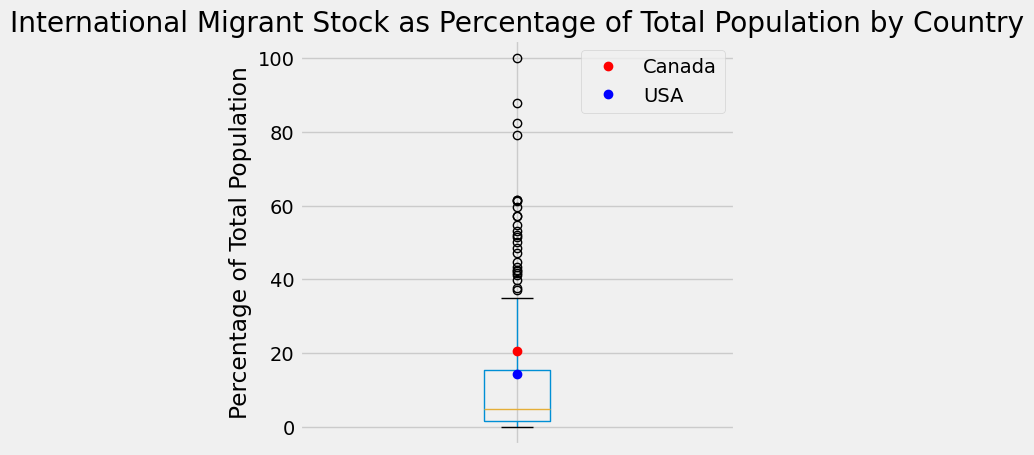

In [20]:
ax1 = df_final_country_only.boxplot(column=['International_migrant_stock_as_percentage_of_total_population'], figsize=(5,5), grid=True)
ax1.set_title('International Migrant Stock as Percentage of Total Population by Country')
ax1.set_ylabel('Percentage of Total Population')
#Choosing the data to be plotted and Naming the graph and the y-axis.

plt.plot(1, 20.5, 'o', color = "Red", label = 'Canada')
plt.plot(1, 14.3, 'o', color = "Blue", label = 'USA')
#Plotting Canada and USA in the box plot

plt.legend()
#Showing the legend

ax1.set(xticklabels=[])
#Removing the tick label. This one took me forever.

plt.show()
#Showing the plot.

From the graph, it is clear that international migrant stock as percentage of total population by country is significantly skewed to the right, with many outliers highlighted in black circles in the box plot above. Comparing to other countries, Canada and USA both have a higher than average international migrant stock as percentage of total population, but still remained in a "normal" range.

## The Use of Population Pyramid

Lastly, we will take a closer look on Canadian international migrant stock as percentage of total population by sex from 1990 to 2015. Are the patterns similar for both sexes, or different? 

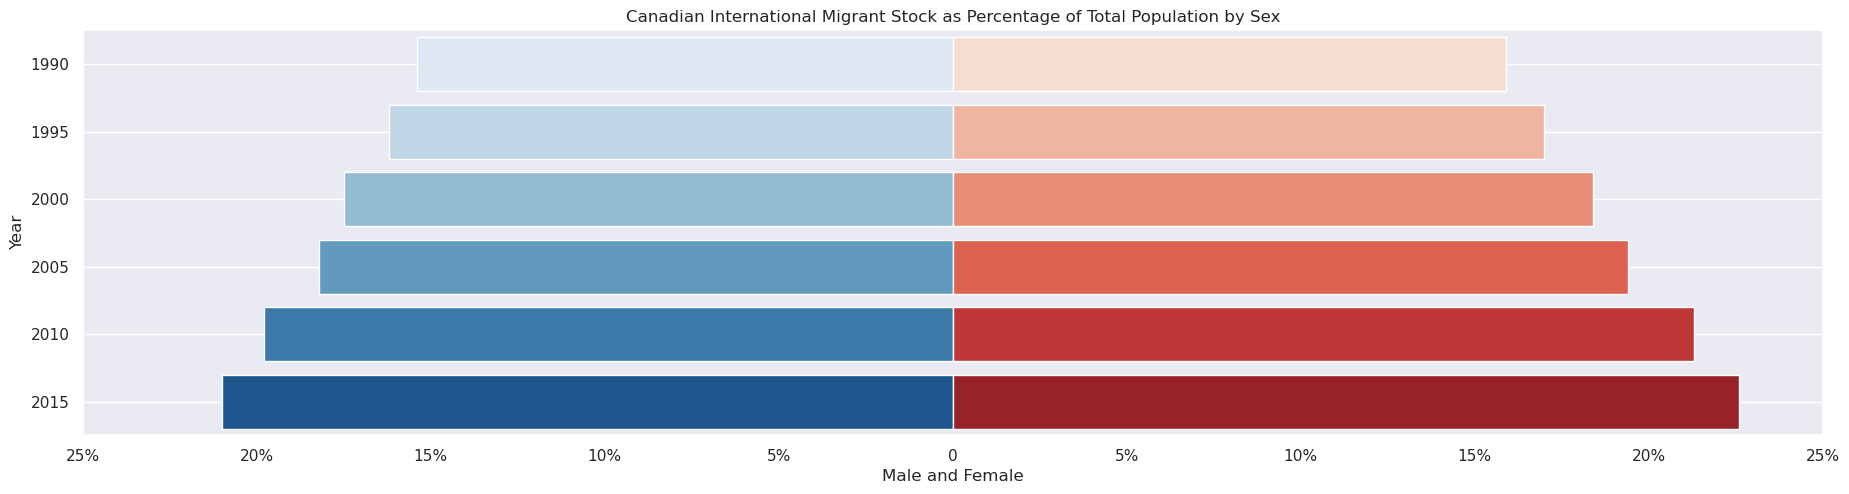

In [47]:
df_5 = pd.DataFrame({ 'Male': [-15.4, -16.2, -17.5, -18.2, -19.8, -21.0], 
                    'Female': [15.9, 17.0, 18.4, 19.4, 21.3, 22.6],
                    'Year': ['1990','1995','2000','2005','2010','2015']})
Year = ['1990','1995','2000','2005','2010','2015']
#Entering the data

ax1 = sns.barplot(x='Male', y='Year', data = df_5, order=Year, palette="Blues")
ax2 = sns.barplot(x='Female', y='Year', data = df_5, order=Year, palette="Reds")
#Plotting the two sexes' data

plt.title("Canadian International Migrant Stock as Percentage of Total Population by Sex")
plt.xlabel("Male and Female")
plt.grid()
plt.xticks(ticks=[-25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25],
labels=['25%', '20%', '15%', '10%', '5%', '0', '5%', '10%', '15%', '20%', '25%'])
#Naming and labelling the graph

sns.set(rc={"figure.figsize":(20, 50)})
#Changing the graph size

plt.show()

#Showing the graph

From the graph, it seems that both sexes follow the same pattern. We can conclude that Canadian international migrant stock as percentage of total population for both sex from 1990 to 2015 are steadly increasing.

# Conclusion

In conclusion, we have used 5 different types of visulizations to show some of our findings from the UN International Immigrant Stock dataset. We first used line graph to see the overall trend of international immigrant stock number of the world, North America, USA, and Canada. Then we used pie chart to show the role of North American international immigrant stock, compared to the rest of the world. After that, we drew bar charts to see the number of, as well as the percentage of international immigrant stock relative to the total population of each country/area in North America. Following that, we used box plot to see the percentage of international immigrant stock relative to the total population of both Canada and USA, compared to other countries/areas all over the world. Lastly, we used population pyramid to compare the patterns for both male and female international immigrant stock in Canada from 1990 to 2015.